In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
input_file = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
infos = pd.read_csv(input_file, sep="\t", header=None)
infos

,0,1,2,3,4,5
0,chr1,2190000,3430000,3,0.153494,0.501613
1,chr1,3430000,5990000,0,0.488190,-0.544654
2,chr1,5990000,6700000,17,0.112054,1.092796
3,chr1,6700000,7650000,3,0.113645,0.560631
4,chr1,7650000,7970000,9,0.035545,1.292355
...,...,...,...,...,...,...
2604,chr9,136730000,136790000,0,0.007350,-0.544654
2605,chr9,136790000,136940000,0,0.038754,-0.544654
2606,chr9,136940000,137120000,0,0.058019,-0.544654
2607,chr9,137120000,137280000,0,0.041934,-0.544654


1066
1543


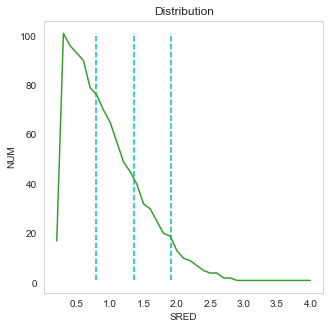

In [3]:
result = infos.loc[infos[3]>0].loc[:,5].round(1).value_counts().sort_index()
x = result.index.tolist()
y = result.values.tolist()

print(infos.loc[infos[3]>0].shape[0])
print(infos.loc[infos[3]<=0].shape[0])

_sigma = infos.loc[infos[3]>0].loc[:,5].std()
_min = infos.loc[infos[3]>0].loc[:,5].min()
_thresholds = [_min+i*_sigma for i in range(1, 4)]

sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)
axes.plot(x, y, color=(51/255, 160/255, 44/255))

plt.xlabel('SRED')
plt.ylabel('NUM')
plt.title('Distribution')

for i in range(3):
    plt.vlines(_thresholds[i], result.values.min(), result.values.max(), colors = "c", linestyles = "dashed")
plt.show()

In [4]:
colors = [
    (0, 159/255, 232/255),
    (222/255, 28/255, 38/255),
    (0, 191/255, 82/255),
    (255/255, 122/255, 23/255)
]
my_pal = {"small": colors[0], "middle": colors[1], "high": colors[2], "very_high": colors[3]}

In [5]:
small = infos.loc[infos[3]>0].loc[infos[5]<_thresholds[0]].copy()
middle = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[0]].loc[infos[5]<_thresholds[1]].copy()
high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[1]].loc[infos[5]<_thresholds[2]].copy()
very_high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[2]].copy()

small["degree"] = "small"
middle["degree"] = "middle"
high["degree"] = "high"
very_high["degree"] = "very_high"

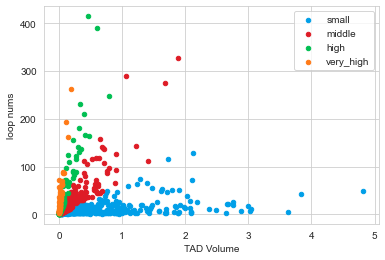

In [6]:
small["TAD Volume"] = small.loc[:, 4]
middle["TAD Volume"] = middle.loc[:, 4]
high["TAD Volume"] = high.loc[:, 4]
very_high["TAD Volume"] = very_high.loc[:, 4]

small["loop nums"] = small.loc[:, 3]
middle["loop nums"] = middle.loc[:, 3]
high["loop nums"] = high.loc[:, 3]
very_high["loop nums"] = very_high.loc[:, 3]

ax = small.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["small"], label='small')
ax = middle.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["middle"], label='middle', ax=ax)
ax = high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["high"], label='high', ax=ax)
ax = very_high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["very_high"], label='very_high', ax=ax)

fig = ax.get_figure()

In [7]:
def find_special_tad(df):
    df = df.copy()
    df["score"] = df["TAD Volume"] * df["loop nums"]
    _special = df.sort_values(by="score", ascending=False)[:5].copy()
    return _special

In [8]:
find_special_tad(small)

,0,1,2,3,4,5,degree,TAD Volume,loop nums,score
1910,chr4,159470000,165110000,128,2.130082,0.764520,small,2.130082,128,272.650525
698,chr13,51130000,72710000,49,4.822833,0.380707,small,4.822833,49,236.318811
645,chr12,109390000,113180000,117,1.722186,0.789146,small,1.722186,117,201.495776
1154,chr18,23410000,32150000,42,3.830052,0.391914,small,3.830052,42,160.862182
461,chr11,64160000,69090000,73,2.114635,0.618720,small,2.114635,73,154.368329


In [9]:
find_special_tad(middle)

,0,1,2,3,4,5,degree,TAD Volume,loop nums,score
1702,chr3,43540000,50620000,327,1.885831,1.140856,middle,1.885831,327,616.666734
2102,chr6,29630000,34420000,275,1.675990,1.116037,middle,1.675990,275,460.897318
656,chr12,120300000,122970000,290,1.054012,1.315438,middle,1.054012,290,305.663514
1454,chr2,231510000,234500000,144,1.220691,0.980955,middle,1.220691,144,175.779560
1724,chr3,79040000,88200000,111,1.402568,0.840670,middle,1.402568,111,155.685041


In [10]:
find_special_tad(high)

,0,1,2,3,4,5,degree,TAD Volume,loop nums,score
1357,chr2,88740000,98400000,390,0.599511,1.663300,high,0.599511,390,233.809232
1368,chr2,106600000,111120000,249,0.787907,1.375454,high,0.787907,249,196.188763
2265,chr7,56380000,67000000,415,0.462136,1.818545,high,0.462136,415,191.786583
313,chr10,35640000,42870000,211,0.392141,1.593531,high,0.392141,211,82.741650
723,chr14,21560000,23560000,164,0.474856,1.423676,high,0.474856,164,77.876375


In [11]:
find_special_tad(very_high)

,0,1,2,3,4,5,degree,TAD Volume,loop nums,score
153,chr1,147710000,150190000,262,0.191297,2.091400,very_high,0.191297,262,50.119915
1908,chr4,157980000,158720000,163,0.140558,2.000072,very_high,0.140558,163,22.910994
1909,chr4,158720000,159450000,193,0.113009,2.356054,very_high,0.113009,193,21.810719
2297,chr7,102280000,103070000,87,0.084021,1.919803,very_high,0.084021,87,7.309833
1244,chr19,42440000,43430000,86,0.065017,2.072156,very_high,0.065017,86,5.591504
